Automatically created module for IPython interactive environment

Filename.........: C:\ProgramData\Anaconda3\lib\site-packages\pydicom\data\test_files\CT_small.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: CompressedSamples, CT1
Patient id.......: 1CT1
Modality.........: CT
Study Date.......: 20040119
Image size.......: 128 x 128, 32768 bytes
Pixel spacing....: [0.661468, 0.661468]
Slice location...: -77.2040634155


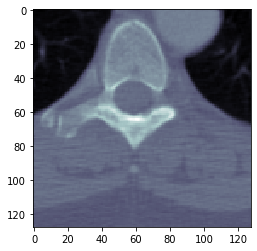

In [6]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

print(__doc__)

filename = get_testdata_files('CT_small.dcm')[0]
dataset = pydicom.dcmread(filename)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()